<a href="https://colab.research.google.com/github/Tej1109/MLP_Pracs/blob/main/MLP_Experiment_9_Logistic_Regression_for_Binary_Classification_Tejas_Upadhyay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Loading the dataset

In [ ]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df = df[["survived","sex","age","fare","pclass","sibsp","parch","embarked"]] #Other features are just redundant, say alive and survived
df

,survived,sex,age,fare,pclass,sibsp,parch,embarked
1,1,female,38.0,71.2833,1,1,0,C
3,1,female,35.0,53.1000,1,1,0,S
6,0,male,54.0,51.8625,1,0,0,S
10,1,female,4.0,16.7000,3,1,1,S
11,1,female,58.0,26.5500,1,0,0,S
...,...,...,...,...,...,...,...,...
871,1,female,47.0,52.5542,1,1,1,S
872,0,male,33.0,5.0000,1,0,0,S
879,1,female,56.0,83.1583,1,0,1,C
887,1,female,19.0,30.0000,1,0,0,S


In [ ]:
#Encoding Labels:
df["sex"] = df["sex"].map({"male":1,"female":0})
df["embarked"] = df["embarked"].map({"S":0,"C":1,"Q":2})

/tmp/ipython-input-928083907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = df["sex"].map({"male":1,"female":0})
/tmp/ipython-input-928083907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"] = df["embarked"].map({"S":0,"C":1,"Q":2})


In [ ]:
df

,survived,sex,age,fare,pclass,sibsp,parch,embarked
1,1,0,38.0,71.2833,1,1,0,1
3,1,0,35.0,53.1000,1,1,0,0
6,0,1,54.0,51.8625,1,0,0,0
10,1,0,4.0,16.7000,3,1,1,0
11,1,0,58.0,26.5500,1,0,0,0
...,...,...,...,...,...,...,...,...
871,1,0,47.0,52.5542,1,1,1,0
872,0,1,33.0,5.0000,1,0,0,0
879,1,0,56.0,83.1583,1,0,1,1
887,1,0,19.0,30.0000,1,0,0,0


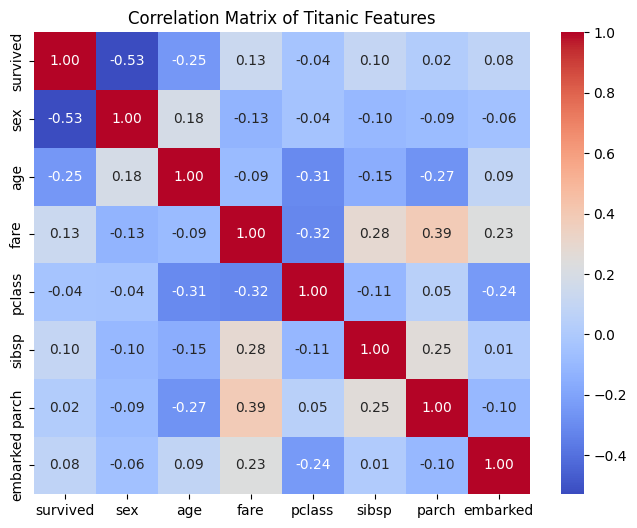

In [ ]:
#Correlation Heatmap:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Titanic Features")
plt.show()

In [ ]:
## Here we can select sex,age,fare,sibsp for making our model as they all have correlation >= 0.10
selected_features = ["sex","sibsp","fare","age"]
X = df[selected_features]
y = df["survived"]

### Train Test Split and Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train,y_train)

0.7655172413793103

### Evaluation Metrics

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.8378378378378378

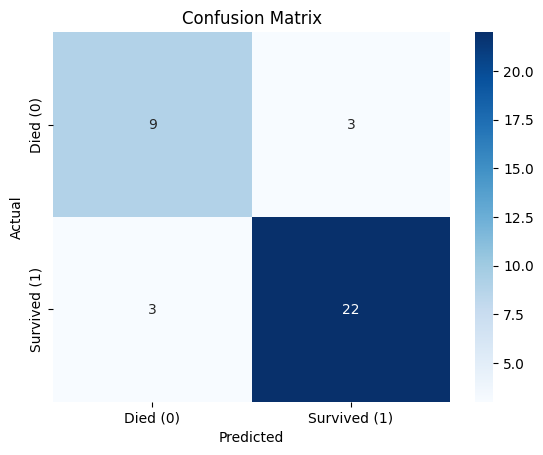

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died (0)', 'Survived (1)'],
            yticklabels=['Died (0)', 'Survived (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Died","Survived"]))



Classification Report:
               precision    recall  f1-score   support

        Died       0.75      0.75      0.75        12
    Survived       0.88      0.88      0.88        25

    accuracy                           0.84        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.84      0.84      0.84        37



In [ ]:
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
coef_df

,Feature,Coefficient
1,sibsp,0.135059
2,fare,0.000594
3,age,-0.027131
0,sex,-2.031944


/tmp/ipython-input-3777711593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="mako")


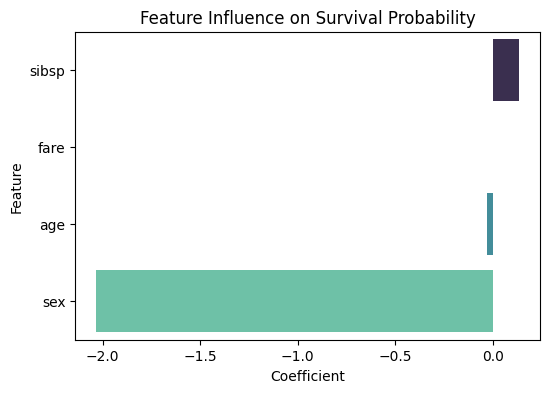

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="mako")
plt.title("Feature Influence on Survival Probability")
plt.show()